<div align="center"><h2>PHASE 5 CAPSTONE PROJECT</h2></div>
<div align="center"><h2>Predictive Modeling for Flight Passenger Preferences and Booking Patterns in Horizon Airlines</h2></div>

# Group Members

* Kamande Karigi
* Lewis Otsieka
* Marion Jelimo
* Titus Kilonzo Mutuku
* Yusra Noor

# BUSINESS UNDERSTANDING

## INTRODUCTION
Horizon Airlines, a prominent player in the aviation industry, stands as a cornerstone of reliable air travel services. As a leading airline company, Horizon Airlines is dedicated to providing safe, efficient, and seamless travel experiences for passengers across Kenya. With a fleet of modern aircraft and a commitment to operational excellence, Horizon Airlines has positioned itself as a trailblazer in the aviation sector. Recognizing the challenges and complexities inherent in managing a vast network of flights, passenger preferences, and operational logistics, Horizon Airlines has enlisted our expertise. Our team has been entrusted with the task of implementing advanced analytics to derive valuable insights from the company's extensive datasets. By harnessing the power of data-driven decision-making, our goal is to assist Horizon Airlines in optimizing its operations, enhancing customer experiences, and maintaining a competitive edge in the dynamic aviation landscape.


## PROBLEM STATEMENT
In the aftermath of the COVID-19 pandemic, the aviation industry is grappling with a multifaceted challenge to revitalize its operations and regain passenger trust. The problem revolves around understanding the intricate dynamics of customer behavior post-COVID, with a focus on influencing factors such as travel preferences, safety concerns, and the demand for additional services. It is crucial for airlines to tailor their services effectively with respect to the specific needs and concerns of passengers, utilising available data to inform effective safety measures, extra baggage, preferred seating, in-flight meals and other passenger preferences. This project provides an opportunity to investigate post-pandemic travel, and guide Horizon airlines to craft strategies that align with evolving customer expectations and foster a robust recovery.

## THE MAIN OBJECTIVES

To develop a model that learns over the available customer booking data, whose inferences improve or smooth out Horizon airlines' services. 

## THE SPECIFIC OBJECTIVES

1. To improve booking conversion rates.
2. To enhance customer segmentation by identifying distinct customer segments based on booking patterns and use the information to tailor marketing strategies, services or offers to specific groups.
3. To increase ancilliary service adoption and optimize marketing or pricing strategies for these services.
4. Optimize Operational Efficiency using patterns related to flight_day and flight_hour to optimize flight schedules, staffing, and other operational aspects.
5. Improve route specific strategies.

These objectives can be interconnected, and addressing one may positively impact others.


## RESEARCH QUESTIONS

1. Booking conversion analysis:
What are the primary factors inluencing booking completion and how do the vary across different sales channels?
Can the `purchase_lead` time be optimized to improve booking conversion rates without adversely affecting other aspects? 

The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome.
Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

2. Flight duration:
Which features are most significant in trying to predict flight duration?
How do aspects such as num of passengers and length of stay relate to flight duration?

3. Customer segmentation:
What are the distinct customer segments based on booking patterns, and how do these segments differ in terms of preferences and behaviors?
How can personalized marketing strategies be developed for each identified segment?

4. Ancillary Service Adoption:
What factors drive customers to opt for extra baggage, preferred seats, or in-flight meals, and are there cross-correlations between these preferences?
Can targeted promotions or bundling strategies be implemented to increase the adoption of these services?

5. Operational Efficiency Optimization:
How do `flight_day` and f`light_hour` affect booking patterns, and how can flight schedules be optimized to match demand?
Are there specific routes (`route`) that exhibit distinct patterns in terms of demand and booking behavior?

6. Route-specific Strategies:
How do customer preferences and behaviors vary across different flight routes, and what marketing or pricing strategies can be implemented for each route?
Are there external factors, such as events or seasons, that significantly impact booking patterns on specific routes?



## DEFINING METRICS OF SUCCESS
1. Booking Conversion Rates: 
Metric: Percentage of completed bookings (`booking_complete`).
Success Criteria: Increase in overall booking conversion rates, with a target improvement percentage.

2. Flight Duration Prediction:
Metric: Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) in predicting `flight_duration`.
Success Criteria: Decrease in prediction error, indicating more accurate flight duration predictions.

3. Customer Segmentation:
Metric: Silhouette Score or Homogeneity Score for clustering quality.
Success Criteria: Improved cluster separation and cohesion, indicating well-defined customer segments.

4. Ancillary Service Adoption:
Metric: Percentage of customers opting for extra baggage, preferred seats, or in-flight meals.
Success Criteria: Increase in adoption rates for targeted ancillary services.

5. Operational Efficiency Optimization:
Metric: Percentage of flights scheduled during peak demand days.
Success Criteria: Optimization of flight schedules with an increase in the proportion of flights scheduled during peak demand times.

6. Route-specific Strategies:
Metric: Percentage increase in bookings for specific routes.
Success Criteria: Successful implementation of targeted marketing or pricing strategies leading to increased bookings on selected routes. 

8. Customer Experience Enhancement:
Metric: Customer Satisfaction Score (CSAT) based on post-travel surveys.
Success Criteria: Increase in overall CSAT scores, indicating enhanced customer experience.

Each metric aligns with the specific objectives and is measurable over time. Feedback will be used to adjust strategies or models as needed to continuously improve performance.

## DATA UNDERSTANDING

The dataset consists of 50,000 entries and comprises 15 columns. It includes both numerical and categorical features, providing insights into flight passenger preferences and booking patterns. Below is an overview of the dataset columns:

* num_passengers - Represents the number of passengers for each booking.

* sales_channel - Denotes the specific channel through which flight bookings were made.

* trip_type - Indicates the type of trip, distinguishing between one-way and round-trip bookings.

* purchase_lead - Represents the lead time (in days) between considering and making a flight purchase.

* length_of_stay - Captures the duration of the stay associated with each flight booking.

* flight_hour - Specifies the hour of the day at which the flight is scheduled.

* flight_day - Records the date of the flight booking.

* route - Describes the specific route of the flight.

* booking_origin - Indicates the origin of the booking, providing insight into the geographic source.

* wants_extra_baggage - Binary variable indicating whether passengers express a desire for additional baggage.

* wants_preferred_seat - Binary variable indicating whether passengers express a preference for specific seating.

* wants_in_flight_meals - Binary variable indicating whether passengers express a desire for in-flight meals.

* flight_duration - Captures the total duration of the flight for each booking.

* booking_complete - Binary variable indicating whether the flight booking process is completed.

## DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The DataFrame has 50,000 rows and 14 columns. There are no missing values in our data. There are 8 integer columns for numerical values, 5 object columns for categorical variables and 1 floating point column. We start by investigating the validity of the data types with respect to column values.

In [4]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


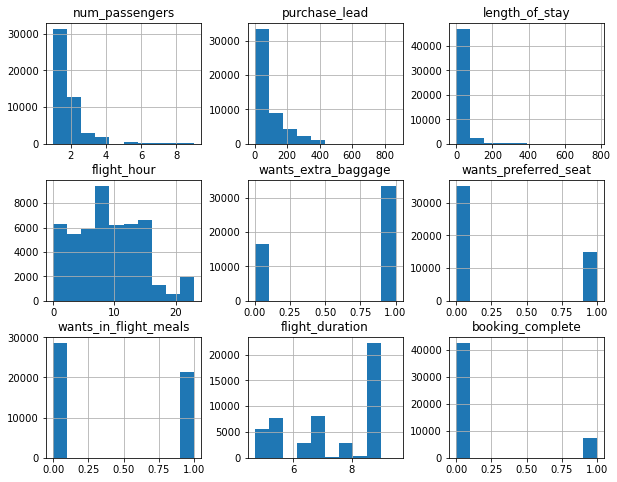

In [5]:
# Visualize the distribution of numerical variables
df.hist(figsize=(10, 8))
plt.show()


From the visualisation, the `num_passengers` column shows that the minimum number of passengers in a booking is 1, while the maximum is 9. It also shows that the majority of bookings involve a relatively small number of passengers, with occasional bookings involving larger passenger groups. The `purchase_lead` column shows that the minimum purchase lead time is 0 days, indicating bookings made on the same day as the travel date. The maximum purchase lead time is 867 days. This suggests a varied distribution of purchase lead times, with a wide range from last-minute bookings to bookings made several months in advance.
The columns `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete` are distributed into 2 specific integer values; 0 and 1, indicating that they are of boolean datatype and not integer, therefore, they shall be converted to boolean to make them categorical columns.
The `flight_hour` column shows that most flights happen early in the morning from 7:30 to 10 am. Outside of these hours, from midnight to 3pm, we have an almost even distribution of flights. These taper off as the day winds down. 


In [6]:
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols].astype('bool')

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,True,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,False,True,False
4,True,False,True,False
...,...,...,...,...
49995,True,False,True,False
49996,False,False,False,False
49997,False,False,True,False
49998,True,False,True,False


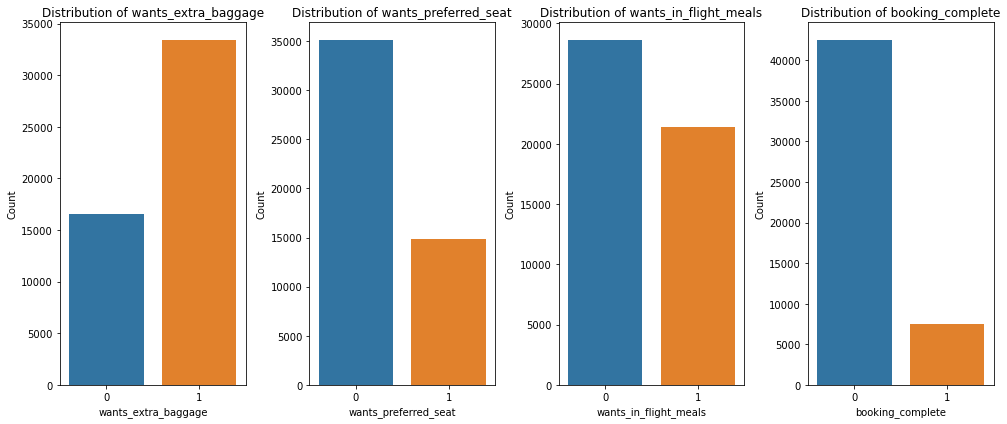

In [7]:
# Selecting only binary preference variables for distribution analysis
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]

# Create subplots for each binary preference variable
plt.figure(figsize=(14, 6))
for i, column in enumerate(binary_preferences.columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [8]:
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]
percentages = binary_preferences.mean() *  100
percentages

wants_extra_baggage      66.878
wants_preferred_seat     29.696
wants_in_flight_meals    42.714
booking_complete         14.956
dtype: float64

Approximately 67% of passengers prefer extra baggage, this is also clear from the visualization. 30% of the passengers had seats they preferred. 42% of the passengers preferred meals in flight. Only about 15% of the bookings were completed.
After evaluating the numerical columns, we investigte categorical columns of object dtype.

In [9]:
categorical_columns = ['booking_origin', 'trip_type', 'flight_day', 'route']
unique_counts = {col: df[col].nunique() for col in categorical_columns}
unique_counts

{'booking_origin': 104, 'trip_type': 3, 'flight_day': 7, 'route': 799}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


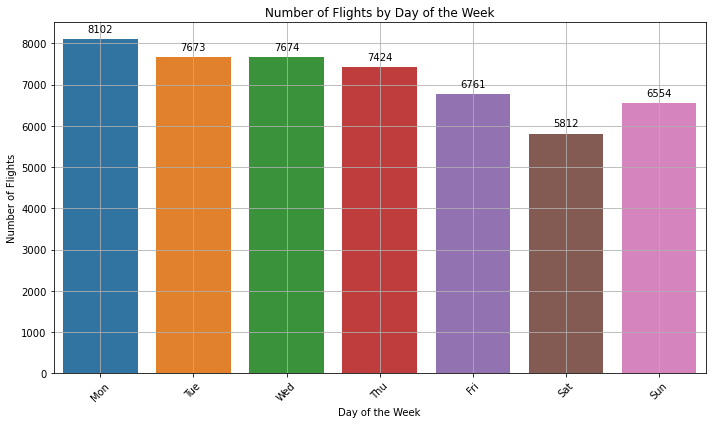

In [11]:
# Check the unique values in 'flight_day' to verify data availability and correct order
print(df['flight_day'].unique())

plt.figure(figsize=(10, 6))

# Count plot for flight_day
ax = sns.countplot(data=df, x='flight_day', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adding value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Day of the Week')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Monday is the busiest day with the highest number of flights, totaling 8102.

Wednesday follows closely with 7674 flights, making it the second busiest day. Tuesday is also competitive, with 7673 flights.

In [12]:
print(df['trip_type'].unique())

['RoundTrip' 'CircleTrip' 'OneWay']


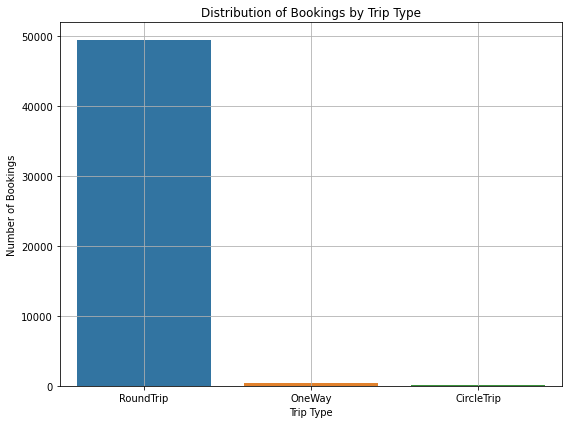

In [13]:

plt.figure(figsize=(8, 6))

# Count plot for trip_type
sns.countplot(data=df, x='trip_type', order=['RoundTrip', 'OneWay', 'CircleTrip'])

# Adding value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Trip Type')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Bookings by Trip Type')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


From the chart, the highest number of bookings were round trips, followed by one way trips. Circle trips which are like round-trips, except that the route on the return trip differs from the route on the outgoing trip, were least booked.



In [14]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000     

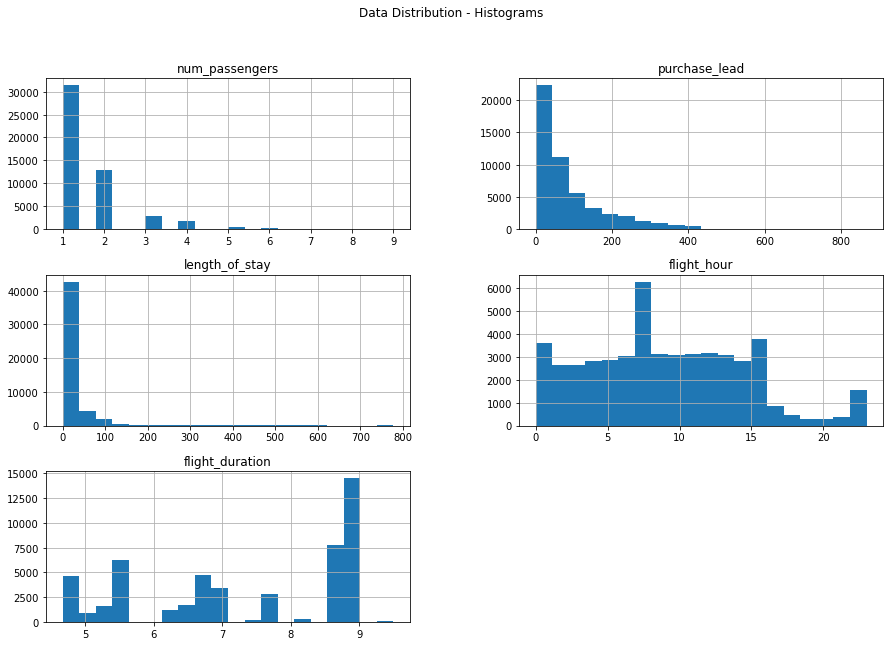

In [15]:
# Data Distribution - Histograms
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Data Distribution - Histograms")
plt.show()

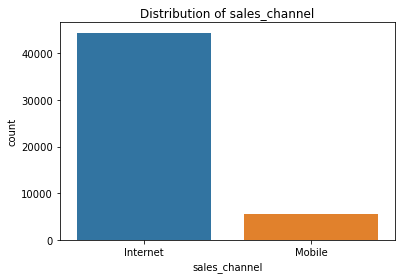

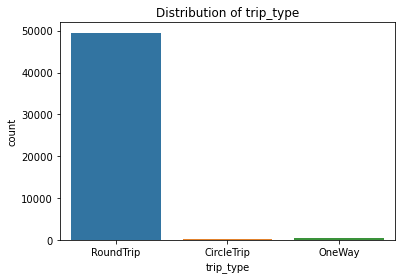

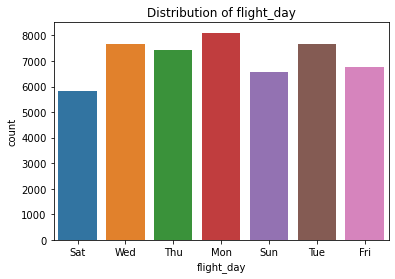

In [16]:
# Data Distribution - Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

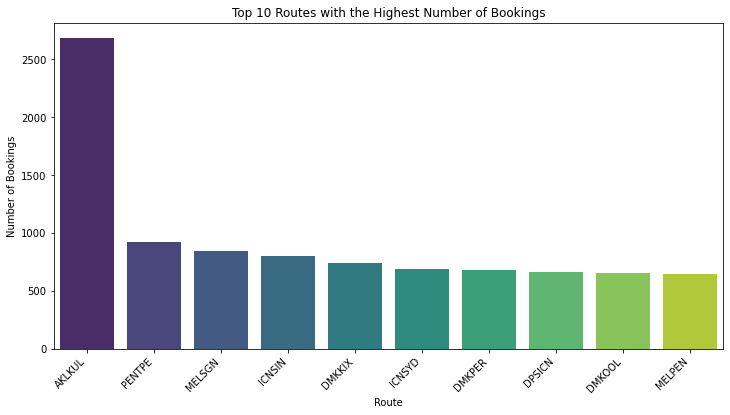

In [17]:
# Get the top 10 routes
top_routes = df['route'].value_counts().nlargest(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, palette='viridis')
plt.title('Top 10 Routes with the Highest Number of Bookings')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

Routes like "AKLKUL," "PENTPE," and "MELSGN" seem to be popular, as they have the highest number of bookings. This could indicate high demand or frequent travel between these locations.

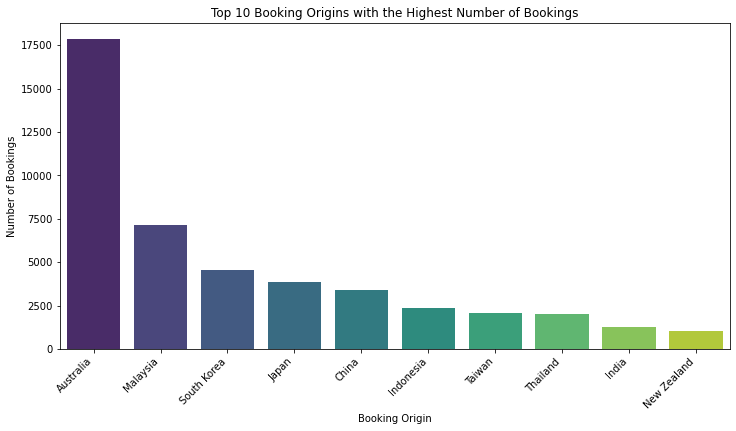

In [18]:
# Get the top 10 booking origins
top_booking_origins = df['booking_origin'].value_counts().nlargest(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_booking_origins.index, y=top_booking_origins.values, palette='viridis')
plt.title('Top 10 Booking Origins with the Highest Number of Bookings')
plt.xlabel('Booking Origin')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

Australia stands out as the top booking origin, indicating a significant number of travelers originating from or booking flights to Australia. Malaysia and South Korea follow Australia in the ranking. 

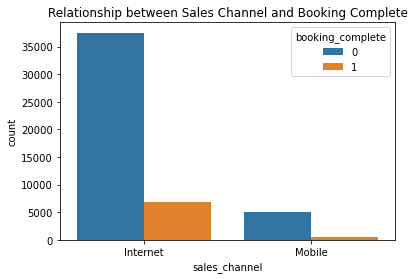

In [19]:
# Explore Relationships - Example: Sales Channel vs. Booking Complete
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title("Relationship between Sales Channel and Booking Complete")
plt.show()

The completion rate is higher for Internet bookings than for Mobile bookings, despite Internet having the most bookings in general, suggests that customers who book through the Internet are m

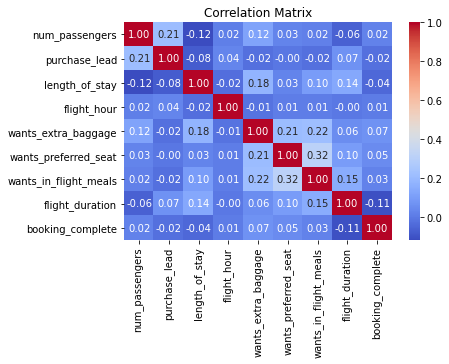

In [20]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

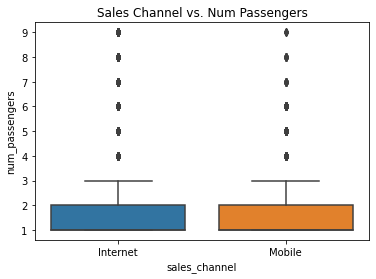

In [21]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

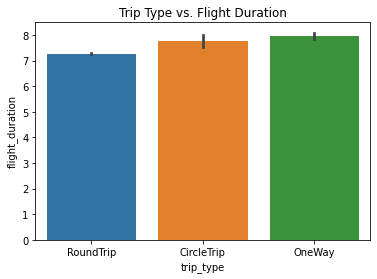

In [22]:
# Segmentation - Example: Trip Type vs. Flight Duration
sns.barplot(x='trip_type', y='flight_duration', data=df)
plt.title("Trip Type vs. Flight Duration")
plt.show()

One-way trips have the highest average flight duration, followed by circle trips and round trips. This could suggest that, on average, one-way flights tend to have longer durations compared to other trip types.

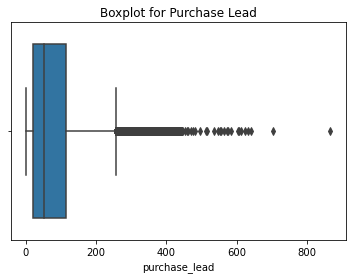

In [23]:
# Outlier Detection - Example: Boxplot for Purchase Lead
sns.boxplot(x='purchase_lead', data=df)
plt.title("Boxplot for Purchase Lead")
plt.show()

In [24]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Feature Engineering

`flight_duration` is in hours, we convert `purchase_lead` and `length_of_stay` into hours too.

In [25]:
# Define conversion factors
hours_in_day = 24

# Convert time-related columns to hours
df['purchase_lead_hours'] = df['purchase_lead'] * hours_in_day
df['length_of_stay_hours'] = df['length_of_stay'] * hours_in_day

# Drop the original columns
df.drop(columns=['purchase_lead', 'length_of_stay'], inplace=True)

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0             5.52                 0   
1                      0  

In [26]:
def categorize_time_of_day(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Convert integer values to string representations of time
df['flight_hour_str'] = df['flight_hour'].astype(str)

# Apply categorize_time_of_day function
df['time_of_day_preference'] = df['flight_hour_str'].apply(categorize_time_of_day)

# Drop after use
df.drop(columns=['flight_hour_str'], inplace=True)

In [27]:
# Define the mapping of days to integers
day_mapping = {'Mon': 1.0, 'Tue': 2.0, 'Wed': 3.0, 'Thu': 4.0, 'Fri': 5.0, 'Sat': 6.0, 'Sun': 7.0}

# Map the 'flight_day' column using the day_mapping dictionary
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Verify that the encoding matches the defined mapping
print(df[['flight_day', 'flight_day_encoded']].sample(6))
# Create 'is_weekend_flight' feature based on 'flight_day'

df['is_weekend_flight'] = df['flight_day_encoded'].apply(lambda x:  1 if x >=  6 else  0)

      flight_day  flight_day_encoded
7560         Thu                 4.0
37461        Wed                 3.0
8849         Sun                 7.0
41590        Wed                 3.0
8406         Sun                 7.0
26550        Mon                 1.0


Create buckets for 'length_of_stay_hours', 'flight_duration' and 'purchase_lead_hours' to categorize stays into short, medium, long, etc. This can help simplify the model and potentially reveal patterns related to stay durations.

Also create buckets based on time period such as weeks and months.

In [28]:
def bin_column(data, num_bins, labels):
    # Use pd.qcut() to bin the column
    binned_column = pd.qcut(data, q=num_bins, labels=labels)
    return binned_column

# define quantiles
num_bins =  3
labels = ['Short', 'Medium', 'Long']
column_= ['length_of_stay_hours', 'purchase_lead_hours', 'flight_duration']

# Create new binned columns for each duration column
for col in column_:
    # Apply bin_column function to create binned column
    df[col + '_binned'] = bin_column(df[col], num_bins, labels)

# Display the DataFrame with new binned columns
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0             5.52                 0   
1                      0  

Create interaction features by combining related variables. For example, we can create features like "wants_extra_baggage_and_preferred_seat" or "wants_meals_and_preferred_seat" to capture combinations of customer preferences. simply multiply the boolean columns representing individual preferences. This will result in a new binary column where a value of 1 indicates that both preferences are true, and a value of 0 indicates that at least one preference is false.

In [29]:
# Create new features for combinations of customer preferences
df['wants_extra_baggage_and_preferred_seat'] = df['wants_extra_baggage'] & df['wants_preferred_seat']
df['wants_meals_and_preferred_seat'] = df['wants_in_flight_meals'] & df['wants_preferred_seat']
df['wants_extra_baggage_and_meals'] = df['wants_extra_baggage'] & df['wants_in_flight_meals']
df['wants_all_services'] = df['wants_extra_baggage'] & df['wants_preferred_seat'] & df['wants_in_flight_meals']
df['wants_seat_and_meals_but_no_baggage'] = (df['wants_preferred_seat'] & df['wants_in_flight_meals']) & ~df['wants_extra_baggage']
df['wants_baggage_and_meals_but_no_seat'] = (df['wants_extra_baggage'] & df['wants_in_flight_meals']) & ~df['wants_preferred_seat']
df['wants_baggage_and_seat_but_no_meals'] = (df['wants_extra_baggage'] & df['wants_preferred_seat']) & ~df['wants_in_flight_meals']


Columns building using aggregate statistics

In [30]:
df[bool_cols] = df[bool_cols].astype('int')

df['total_preferences'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,...,Long,Short,0,0,0,0,0,0,0,1
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,...,Long,Short,0,0,0,0,0,0,0,0
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,...,Long,Short,1,0,0,0,0,0,1,2
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,...,Long,Short,0,0,0,0,0,0,0,1
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,...,Medium,Short,0,0,1,0,0,1,0,2


In [31]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by sales_channel
agg_sales = df.groupby('sales_channel').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_sales.columns = ['sales_channel', 'avg_purchase_lead_sales', 'std_purchase_lead_sales', 'avg_length_of_stay_sales', 'std_length_of_stay_sales']

df = pd.merge(df, agg_sales, on='sales_channel', how='left')
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,...,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,...,0,0,0,0,0,0,2048.920373,2173.450504,570.532919,828.813233
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,...,0,0,0,0,1,2,2048.920373,2173.450504,570.532919,828.813233
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,...,0,0,0,0,0,1,2048.920373,2173.450504,570.532919,828.813233
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,...,1,0,0,1,0,2,2048.920373,2173.450504,570.532919,828.813233


In [32]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by trip_type
agg_trip = df.groupby('trip_type').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_trip.columns = ['trip_type', 'avg_purchase_lead_trip', 'std_purchase_lead_trip', 'avg_length_of_stay_trip', 'std_length_of_stay_trip']

df = pd.merge(df, agg_trip, on='trip_type', how='left')
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,...,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,...,0,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,1,1,0,...,1,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,0,0,1,...,0,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,1,0,1,...,0,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874


In [33]:
# Compute the variance of 'flight_duration' and 'flight_day_encoded' grouped by 'route'
variance_by_route = df.groupby('route').agg({'flight_duration': 'var', 'flight_day_encoded': 'var'}).reset_index()
variance_by_route.columns = ['route', 'variance_flight_duration_by_route', 'variance_flight_day_by_route']

# Compute the variance of 'flight_duration' and 'flight_day_encoded' grouped by 'booking_origin'
variance_by_origin = df.groupby('booking_origin').agg({'flight_duration': 'var', 'flight_day_encoded': 'var'}).reset_index()
variance_by_origin.columns = ['booking_origin', 'variance_flight_duration_by_origin', 'variance_flight_day_by_origin']

# Merge the calculated variances back to the original DataFrame 'df'
df = pd.merge(df, variance_by_route, on='route', how='left')
df = pd.merge(df, variance_by_origin, on='booking_origin', how='left')

In [34]:
import airportsdata

# Load the airport data using the IATA code as the key
airports = airportsdata.load('IATA')

# Function to retrieve airport information for an airport code
def get_airport_info(airport_code):
    airport_info = airports.get(airport_code)
    if airport_info:
        return {
            'latitude': airport_info['lat'],
            'longitude': airport_info['lon'],
            'city': airport_info['city'],
            'timezone': airport_info['tz']
        }
    else:
        return None  # Return None if data is not found for the airport code

# Iterate over rows in the dataframe and retrieve airport information for each airport code
for index, row in df.iterrows():
    origin_code = row['route'][:3]
    dest_code = row['route'][3:]
    
    origin_info = get_airport_info(origin_code)
    dest_info = get_airport_info(dest_code)
    
    if origin_info:
        df.at[index, 'origin_latitude'] = origin_info['latitude']
        df.at[index, 'origin_longitude'] = origin_info['longitude']
        df.at[index, 'origin_city'] = origin_info['city']
        df.at[index, 'origin_timezone'] = origin_info['timezone']
    
    if dest_info:
        df.at[index, 'dest_latitude'] = dest_info['latitude']
        df.at[index, 'dest_longitude'] = dest_info['longitude']
        df.at[index, 'dest_city'] = dest_info['city']
        df.at[index, 'dest_timezone'] = dest_info['timezone']


Calculate distances, now that we have latitude and longitude. Euclidean distance is the straight-line distance between two points in a two-dimensional space, such as a Cartesian coordinate system. When applied to geographical data, it treats the Earth's surface as a flat plane, which can lead to inaccuracies, especially for long distances. Great Circle distance, also known as orthodromic distance, is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (i.e., the Earth). It takes into account the curvature of the Earth, representing the shortest path between two points along the surface of the Earth. Great Circle distance is more accurate for calculating distances over long distances, especially when considering travel routes on the Earth's surface.

In [35]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate euclidean distance

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# Function to calculate great circle distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate the change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Use Haversine formula to calculate distance
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Calculate Euclidean Distance
df['euclidean_distance'] = euclidean_distance(df['origin_latitude'], df['origin_longitude'], 
                                               df['dest_latitude'], df['dest_longitude'])

# Calculate Great Circle Distance (Haversine Distance)
df['great_circle_distance'] = df.apply(lambda row: haversine_distance(row['origin_latitude'], row['origin_longitude'],
                                                                     row['dest_latitude'], row['dest_longitude']),
                                       axis=1)


In [36]:
print(df[['origin_city', 'booking_origin', 'dest_city', 'route', 'trip_type']].sample(10))

                  origin_city booking_origin   dest_city   route  trip_type
17207    Medan-Sumatra Island         Taiwan      Taipei  KNOTPE  RoundTrip
22885                  Penang      Australia      Sydney  PENSYD  RoundTrip
29862                 Jakarta    South Korea       Seoul  CGKICN  RoundTrip
17710               Kathmandu       Malaysia      Penang  KTMPEN  RoundTrip
33158  Yogyakarta-Java Island          Japan       Osaka  JOGKIX  RoundTrip
9241                  Bangkok      Australia  Gold Coast  DMKOOL  RoundTrip
47152                   Seoul    South Korea    Langkawi  ICNLGK  RoundTrip
24061                   Perth      Australia       Wuhan  PERWUH  RoundTrip
6449                   Cochin      Australia  Gold Coast  COKOOL  RoundTrip
28525                   Osaka      Singapore   Singapore  KIXSIN  RoundTrip


Analyze data on the frequency of flights between origin and destination airports. This can indicate the popularity and demand for specific routes, which may affect booking completion rates.

In [37]:
# your analysis here


# Segmentation Analysis:

Conduct segmentation analysis to identify subgroups of customers based on the interaction feature and binary columns. This can be done based on the booking complete column. The goal is to find out why so many customers are not completing their order, and if there is any unique traits about those that complete their orders.

# can we do this earlier on in the notebook, or say it has been done in eda, so maybe just do clustering later on while building the model


In [38]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'purchase_lead_hours', 'length_of_stay_hours',
       'time_of_day_preference', 'flight_day_encoded', 'is_weekend_flight',
       'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg_length_of_stay_trip', 'std_length_of_stay

Booking completion based segmentaion.

In [39]:
complete_bookings_subset = df[df['booking_complete'] == True]

complete_bookings_subset.sample(8)

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
48692,2,Internet,RoundTrip,12,Mon,LGKTPE,Taiwan,0,0,0,...,6.329730,99.728699,Langkawi,Asia/Kuala_Lumpur,25.077700,121.233002,Taipei,Asia/Taipei,28.529308,3095.358257
1505,1,Internet,RoundTrip,14,Mon,AKLKUL,Malaysia,0,0,0,...,-37.008099,174.792007,Auckland,Pacific/Auckland,2.745580,101.709999,Kuala Lumpur,Asia/Kuala_Lumpur,83.194561,8703.353493
26052,1,Internet,RoundTrip,5,Fri,ICNPEN,South Korea,1,1,1,...,37.469101,126.450996,Seoul,Asia/Seoul,5.297140,100.277000,Penang,Asia/Kuala_Lumpur,41.474247,4454.019856
10542,1,Internet,RoundTrip,7,Tue,DPSHND,Indonesia,1,1,1,...,-8.748170,115.167000,Denpasar-Bali Island,Asia/Makassar,35.552299,139.779999,Tokyo,Asia/Tokyo,50.678707,5561.090496
40686,2,Internet,RoundTrip,5,Sun,MELMYY,Malaysia,1,0,0,...,-37.673302,144.843002,Melbourne,Australia/Melbourne,4.322010,113.987000,Miri,Asia/Kuching,52.112370,5653.157177
15648,1,Internet,RoundTrip,19,Thu,JHBMRU,Mauritius,1,0,1,...,1.641310,103.669998,Senai,Asia/Kuala_Lumpur,-20.430201,57.683601,Port Louis,Indian/Mauritius,51.008825,5575.778562
48185,2,Mobile,RoundTrip,16,Sun,KCHTPE,United States,0,0,1,...,1.484700,110.347000,Kuching,Asia/Kuala_Lumpur,25.077700,121.233002,Taipei,Asia/Taipei,25.983354,2871.761928
25308,1,Mobile,RoundTrip,1,Sun,SYDTPE,Taiwan,1,1,0,...,-33.946098,151.177002,Sydney,Australia/Sydney,25.077700,121.233002,Taipei,Asia/Taipei,66.184982,7285.423897


In [40]:
trip_type_counts = complete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

RoundTrip     7453
OneWay          20
CircleTrip       5
Name: trip_type, dtype: int64


In [41]:
incomplete_bookings_subset = df[df['booking_complete'] != True]
incomplete_bookings_subset.sample(6)

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
39677,1,Internet,OneWay,8,Sun,ICNSYD,South Korea,0,0,0,...,37.469101,126.450996,Seoul,Asia/Seoul,-33.946098,151.177002,Sydney,Australia/Sydney,75.574507,8342.753254
12365,1,Mobile,RoundTrip,21,Mon,HKTSYD,Australia,0,1,0,...,8.113200,98.316902,Phuket,Asia/Bangkok,-33.946098,151.177002,Sydney,Australia/Sydney,67.551275,7266.838596
2127,2,Mobile,RoundTrip,14,Sun,AKLKUL,Malaysia,1,0,0,...,-37.008099,174.792007,Auckland,Pacific/Auckland,2.745580,101.709999,Kuala Lumpur,Asia/Kuala_Lumpur,83.194561,8703.353493
561,1,Internet,RoundTrip,17,Tue,AKLKUL,Malaysia,1,1,0,...,-37.008099,174.792007,Auckland,Pacific/Auckland,2.745580,101.709999,Kuala Lumpur,Asia/Kuala_Lumpur,83.194561,8703.353493
27966,1,Internet,RoundTrip,1,Sun,ICNKCH,Malaysia,0,0,1,...,37.469101,126.450996,Seoul,Asia/Seoul,1.484700,110.347000,Kuching,Asia/Kuala_Lumpur,39.423544,4327.510490
24772,1,Internet,RoundTrip,3,Mon,SGNSYD,Australia,1,0,1,...,10.818800,106.652000,Ho Chi Minh City,Asia/Ho_Chi_Minh,-33.946098,151.177002,Sydney,Australia/Sydney,63.137722,6846.130404


In [42]:
trip_type_counts = incomplete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

RoundTrip     42044
OneWay          367
CircleTrip      111
Name: trip_type, dtype: int64


In [43]:
df['origin_timezone'].sample(5)

39368        Asia/Seoul
45071     Asia/Makassar
4425       Asia/Jakarta
49452     Asia/Shanghai
11517    Asia/Hong_Kong
Name: origin_timezone, dtype: object

## Transformation

Since hours of the day have a cyclical nature, you can encode flight_hour using trigonometric functions like sine and cosine. This transformation can capture the periodicity of time features and prevent issues such as treating 23:00 and 00:00 as far apart. The technique transforms the hour of the day into two continuous variables, which represent the cyclic pattern of time.

In [44]:
# Perform periodic encoding for flight_hour
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour'] / hours_in_day)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour'] / hours_in_day)

# Drop flight_hour
df = df.drop(['flight_hour', 'flight_day'], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   num_passengers                          50000 non-null  int64   
 1   sales_channel                           50000 non-null  object  
 2   trip_type                               50000 non-null  object  
 3   route                                   50000 non-null  object  
 4   booking_origin                          50000 non-null  object  
 5   wants_extra_baggage                     50000 non-null  int64   
 6   wants_preferred_seat                    50000 non-null  int64   
 7   wants_in_flight_meals                   50000 non-null  int64   
 8   flight_duration                         50000 non-null  float64 
 9   booking_complete                        50000 non-null  int64   
 10  purchase_lead_hours                     50000 

Normalize the time-related columns to ensure they're on the same scale.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['purchase_lead_hours', 'length_of_stay_hours', 'flight_duration']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print first few rows to verify the changes
print(df.head())


   num_passengers sales_channel  trip_type   route booking_origin  \
0               2      Internet  RoundTrip  AKLDEL    New Zealand   
1               1      Internet  RoundTrip  AKLDEL    New Zealand   
2               2      Internet  RoundTrip  AKLDEL          India   
3               1      Internet  RoundTrip  AKLDEL    New Zealand   
4               2      Internet  RoundTrip  AKLDEL          India   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  ...  origin_city   origin_timezone  \
0         0.175983                 0  ...     Auckland  Pacific/Auckland   
1     

In [47]:
df['booking_origin'].head()

0    New Zealand
1    New Zealand
2          India
3    New Zealand
4          India
Name: booking_origin, dtype: object

One hot encoding `sales_channel` and `trip_type` because they have a small number of unique values. 

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical columns and transform the data
one_hot_encoded = encoder.fit_transform(df[['sales_channel', 'trip_type', 'time_of_day_preference', 'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned']])

# Convert the one-hot encoded result to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['sales_channel', 'trip_type', 'time_of_day_preference', 'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns if needed
df = df.drop(['sales_channel', 'trip_type', 'time_of_day_preference' , 'length_of_stay_hours_binned', 'purchase_lead_hours_binned', 'flight_duration_binned'], axis=1)


In [49]:
df.dtypes

num_passengers                         int64
route                                 object
booking_origin                        object
wants_extra_baggage                    int64
wants_preferred_seat                   int64
                                      ...   
purchase_lead_hours_binned_Medium    float64
purchase_lead_hours_binned_Short     float64
flight_duration_binned_Long          float64
flight_duration_binned_Medium        float64
flight_duration_binned_Short         float64
Length: 61, dtype: object

Label encoding route, origin_city, origin_timezone, dest_city, dest_timezone because they have several different categorical variable in them that would balloon the number of columns and reduce model interpretability if they are one hot encoded.

In [50]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df, features):
    """
    Encode categorical features in the DataFrame using LabelEncoder.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - features: list of feature names to be encoded
    
    Returns:
    - df: pandas DataFrame with encoded categorical features
    """
    label_encoder = LabelEncoder()
    for feature in features:
        df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature])
    return df

# List of categorical features to be encoded
categorical_features = ['route', 'booking_origin', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone']

# Encode categorical features
df = label_encode_features(df, categorical_features)

# Drop the original categorical columns if needed
df = df.drop(['route', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone', 'booking_origin'], axis=1)

In [51]:
df.columns

Index(['num_passengers', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours', 'flight_day_encoded',
       'is_weekend_flight', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg_length_of_stay_trip', 'std_length_of_stay_trip',
       'variance_flight_duration_by_route', 'variance_flight_day_by_route',
       'variance_flight_duration_by_origin', 'variance_flight_day_by_origin',
       'origin_latitude', 'origin_longitude', 'dest_latitu

In [52]:
print(df.head())

   num_passengers  wants_extra_baggage  wants_preferred_seat  \
0               2                    1                     0   
1               1                    0                     0   
2               2                    1                     1   
3               1                    0                     0   
4               2                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                      0         0.175983                 0   
1                      0         0.175983                 0   
2                      0         0.175983                 0   
3                      1         0.175983                 0   
4                      1         0.175983                 0   

   purchase_lead_hours  length_of_stay_hours  flight_day_encoded  \
0             0.302191              0.024422                 6.0   
1             0.129181              0.025707                 6.0   
2             0.280277          

## Feature Importance Analysis

Use resampling methods such as bootstrapping or permutation tests to estimate the uncertainty associated with feature importance scores.



Chi-Square Test for Independence is used to determine whether there is a significant association between two categorical variables.
We can use this test to assess the relationship between categorical features (e.g., 'sales_channel', 'trip_type') and the target variable ('booking_complete').

ANOVA is used to compare the means of two or more groups to determine if there are statistically significant differences between them.
We can use ANOVA to assess the significance of numerical features (e.g., 'flight_duration', 'purchase_lead_hours') across different levels of the target variable and ANOVA with interaction terms for statistical significance of interaction effects

A T-test to compare the means of numerical features between completed and non-completed bookings.

Calculate correlation coefficients (e.g., Pearson correlation) to assess the linear relationship between numerical features and the target variable.
This helps identify features with a strong correlation with the target variable.

In [53]:
# List of probable target variables
probable_targets = ['num_passengers', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours', 'flight_day_encoded',
       'is_weekend_flight', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg_length_of_stay_trip', 'std_length_of_stay_trip',
       'variance_flight_duration_by_route', 'variance_flight_day_by_route',
       'variance_flight_duration_by_origin', 'variance_flight_day_by_origin',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'euclidean_distance', 'great_circle_distance',
       'flight_hour_sin', 'flight_hour_cos', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'time_of_day_preference_Afternoon',
       'time_of_day_preference_Evening', 'time_of_day_preference_Morning',
       'length_of_stay_hours_binned_Long',
       'length_of_stay_hours_binned_Medium',
       'length_of_stay_hours_binned_Short', 'purchase_lead_hours_binned_Long',
       'purchase_lead_hours_binned_Medium', 'purchase_lead_hours_binned_Short',
       'flight_duration_binned_Long', 'flight_duration_binned_Medium',
       'flight_duration_binned_Short', 'route_encoded',
       'booking_origin_encoded', 'origin_city_encoded',
       'origin_timezone_encoded', 'dest_city_encoded',
       'dest_timezone_encoded']

# Number of top and bottom coefficients to display
n = 5

# Iterate through each probable target variable
for target_variable in probable_targets:
    # Calculate correlations with the target variable
    correlation_with_target = df.corr()[target_variable]
    # Sort correlations in descending order
    sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
    # Print the top and bottom n correlated features
    print(f"\nTop {n} Correlated Features with {target_variable}:")
    print(sorted_correlation.head(n))
    print(f"\nBottom {n} Correlated Features with {target_variable}:")
    print(sorted_correlation.tail(n))



Top 5 Correlated Features with num_passengers:
num_passengers                      1.000000
purchase_lead_hours                 0.212606
purchase_lead_hours_binned_Long     0.187665
purchase_lead_hours_binned_Short    0.164395
length_of_stay_hours_binned_Long    0.135646
Name: num_passengers, dtype: float64

Bottom 5 Correlated Features with num_passengers:
trip_type_OneWay                     0.002195
std_length_of_stay_trip              0.002152
avg_length_of_stay_trip              0.001896
trip_type_CircleTrip                 0.001053
variance_flight_duration_by_route         NaN
Name: num_passengers, dtype: float64

Top 5 Correlated Features with wants_extra_baggage:
wants_extra_baggage                       1.000000
total_preferences                         0.670103
wants_extra_baggage_and_meals             0.500680
wants_extra_baggage_and_preferred_seat    0.399005
wants_all_services                        0.324571
Name: wants_extra_baggage, dtype: float64

Bottom 5 Correlated F


Top 5 Correlated Features with wants_all_services:
wants_all_services                        1.000000
wants_meals_and_preferred_seat            0.928038
wants_extra_baggage_and_preferred_seat    0.813450
total_preferences                         0.738437
wants_preferred_seat                      0.709634
Name: wants_all_services, dtype: float64

Bottom 5 Correlated Features with wants_all_services:
time_of_day_preference_Afternoon     0.003583
trip_type_CircleTrip                 0.002565
origin_city_encoded                  0.001106
origin_timezone_encoded              0.000117
variance_flight_duration_by_route         NaN
Name: wants_all_services, dtype: float64

Top 5 Correlated Features with wants_seat_and_meals_but_no_baggage:
wants_seat_and_meals_but_no_baggage    1.000000
wants_meals_and_preferred_seat         0.306394
wants_preferred_seat                   0.234287
wants_extra_baggage                    0.216367
wants_in_flight_meals                  0.176338
Name: wants_seat_


Top 5 Correlated Features with variance_flight_duration_by_route:
num_passengers          NaN
wants_extra_baggage     NaN
wants_preferred_seat    NaN
wants_in_flight_meals   NaN
flight_duration         NaN
Name: variance_flight_duration_by_route, dtype: float64

Bottom 5 Correlated Features with variance_flight_duration_by_route:
booking_origin_encoded    NaN
origin_city_encoded       NaN
origin_timezone_encoded   NaN
dest_city_encoded         NaN
dest_timezone_encoded     NaN
Name: variance_flight_duration_by_route, dtype: float64

Top 5 Correlated Features with variance_flight_day_by_route:
variance_flight_day_by_route          1.000000
flight_duration_binned_Medium         0.202727
flight_duration_binned_Short          0.178564
variance_flight_day_by_origin         0.158180
variance_flight_duration_by_origin    0.145723
Name: variance_flight_day_by_route, dtype: float64

Bottom 5 Correlated Features with variance_flight_day_by_route:
trip_type_OneWay                     0.001222
st


Top 5 Correlated Features with trip_type_CircleTrip:
trip_type_CircleTrip       1.000000
avg_purchase_lead_trip     0.648698
trip_type_RoundTrip        0.478359
std_purchase_lead_trip     0.401461
avg_length_of_stay_trip    0.231394
Name: trip_type_CircleTrip, dtype: float64

Bottom 5 Correlated Features with trip_type_CircleTrip:
dest_city_encoded                    0.001038
wants_extra_baggage_and_meals        0.000895
time_of_day_preference_Afternoon     0.000836
wants_preferred_seat                 0.000407
variance_flight_duration_by_route         NaN
Name: trip_type_CircleTrip, dtype: float64

Top 5 Correlated Features with trip_type_OneWay:
trip_type_OneWay           1.000000
std_length_of_stay_trip    0.999268
avg_length_of_stay_trip    0.973837
std_purchase_lead_trip     0.914158
trip_type_RoundTrip        0.876119
Name: trip_type_OneWay, dtype: float64

Bottom 5 Correlated Features with trip_type_OneWay:
purchase_lead_hours_binned_Medium      0.001135
flight_hour_sin        


Top 5 Correlated Features with flight_duration_binned_Long:
flight_duration_binned_Long     1.000000
flight_duration                 0.687735
flight_duration_binned_Short    0.565063
euclidean_distance              0.514656
great_circle_distance           0.507714
Name: flight_duration_binned_Long, dtype: float64

Bottom 5 Correlated Features with flight_duration_binned_Long:
is_weekend_flight                      0.009060
wants_baggage_and_seat_but_no_meals    0.005412
variance_flight_day_by_route           0.005114
wants_seat_and_meals_but_no_baggage    0.004618
variance_flight_duration_by_route           NaN
Name: flight_duration_binned_Long, dtype: float64

Top 5 Correlated Features with flight_duration_binned_Medium:
flight_duration_binned_Medium    1.000000
flight_duration_binned_Short     0.521449
flight_duration_binned_Long      0.409347
dest_city_encoded                0.399907
dest_longitude                   0.329226
Name: flight_duration_binned_Medium, dtype: float64

Bott

In [54]:
from scipy.stats import chi2_contingency

# List of features to compare with 'booking_origin_sales_channel'
features_to_compare = [
    'wants_extra_baggage_and_preferred_seat',
    'wants_meals_and_preferred_seat',
    'wants_extra_baggage_and_meals',
    'wants_all_services',
    'wants_seat_and_meals_but_no_baggage',
    'wants_baggage_and_meals_but_no_seat',
    'wants_baggage_and_seat_but_no_meals',
    'wants_extra_baggage',
    'wants_preferred_seat',
    'wants_in_flight_meals',
    'is_weekend_flight'
]

# Perform chi-squared test for independence

for feature in features_to_compare:
    contingency_table = pd.crosstab(df['booking_origin_sales_channel'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}\nChi-squared test statistic: {chi2}\np-value: {p}\n")


KeyError: 'booking_origin_sales_channel'

## Undersample majority class

Drop columns that will not be useful in modeling

## Modeling

Utilize univariate feature selection methods like SelectKBest with chi-squared or F-tests to select the most significant features.
This approach evaluates the significance of each feature individually in relation to the target variable.

random forest feature importance or gradient boosting feature importance to rank features based on their predictive power.

## Evaluation

Evaluate the model performance using appropriate metrics that account for class imbalance and bias, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC). Avoid solely relying on accuracy, especially in imbalanced datasets, as it may not accurately reflect model performance.